# Perceptron


In [48]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [49]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 100):
       # self.w_= np.float64 
       
        self.w_ = (np.random.rand(1 + X.shape[1]))
        self.errors_ = []
        N = X.shape[0]
           

        for _ in range(epochs):
            errors=np.float64
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += (.5*((self.predict(xi) - target)**2))
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = ((X@self.w_[:-1]) + self.w_[-1])
        return self.activation_function(preactivation)


In [50]:
def linear(z):
    return z

def MSE(y_hat, y):
    return .5*(y_hat - y)**2



In [81]:
node = SingleNeuron(linear)
node.train(Xp, yp, alpha = .001, epochs = 200)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
domain = np.linspace(np.min(Xp) - .5, np.max(Xp) + .5, 100)

ax1.scatter(X, y, color = "green")
yhat=node.predict(X.reshape(-1, 1))
print (yhat)
mse= MSE(yhat,y)
#print (yhat)
#print ("MSE :", sum(mse)/len(mse))

ax1.plot(domain, node.predict(domain.reshape(-1, 1)), color = "black")
ax1.set_xlabel("Altitude [m]", fontsize = 15)
ax1.set_ylabel("Total cup points [point]", fontsize = 15)
ax1.set_title("Coffee Arabiga Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()
plt.close()



AttributeError: 'list' object has no attribute 'shape'

<ipython-input-71-c5c2ffafdc20>:48: RuntimeWarning: overflow encountered in double_scalars
  errors += (.5*((self.predict(xi) - target)**2))
<ipython-input-71-c5c2ffafdc20>:53: RuntimeWarning: overflow encountered in matmul
  preactivation = ((X@self.w_[:-1]) + self.w_[-1])
<ipython-input-71-c5c2ffafdc20>:53: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = ((X@self.w_[:-1]) + self.w_[-1])


MSE : nan


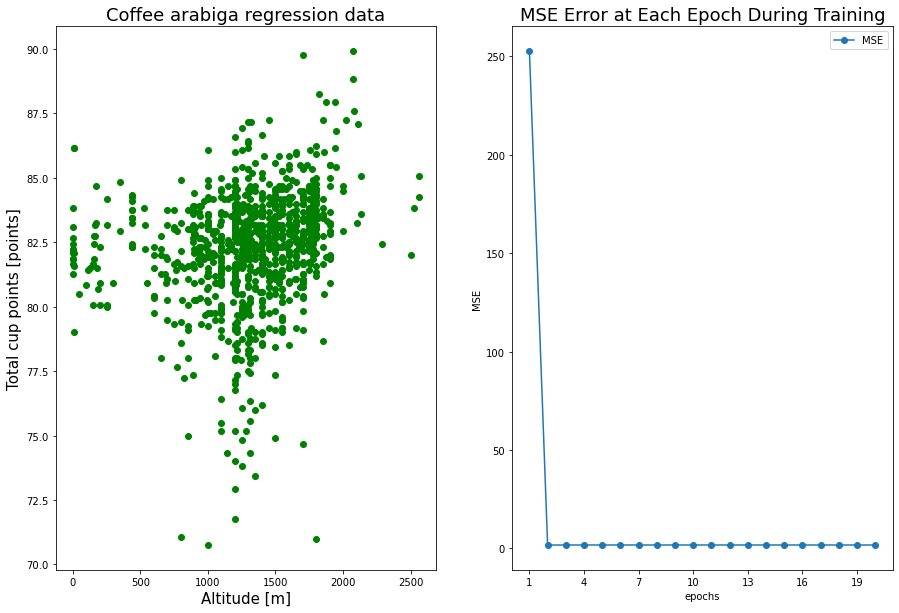

In [83]:
#cafe_final.altitude_mean_meters.replace(0, 1)
#cafe_final= cafe_final.round({'altitude_mean_meters': 1})
X = cafe_final.altitude_mean_meters.values
y = cafe_final.Total_points.values
X=np.round(X,0)
X = X.reshape(-1, 1)
node = SingleNeuron(linear)
node.train(X, y, alpha = 0.0001, epochs = 20)
yhat=node.predict(X1.reshape(-1, 1))
mse= MSE(yhat,y)
print ("MSE :", sum(mse)/len(mse))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "green")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)), color = "black")
ax1.set_xlabel("Altitude [m]", fontsize = 15)
ax1.set_ylabel("Total cup points [points]", fontsize = 15)
ax1.set_title("Coffee arabiga regression data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node1.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 3))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()
plt.close()


MSE : 2.1627256492134133


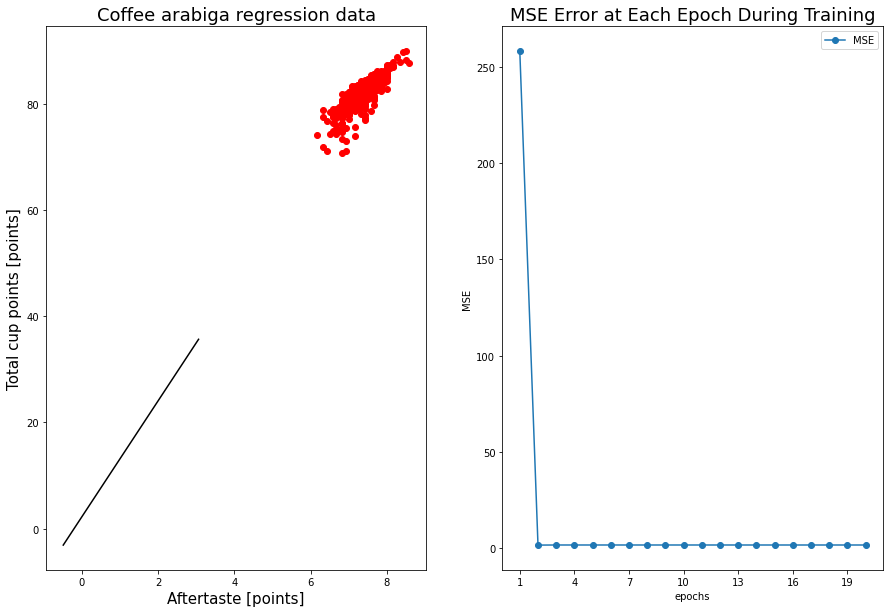

In [84]:
X1 = cafe_final.Aftertaste.values
y1 = cafe_final.Total_points.values
X1 = X1.reshape(-1, 1)
node1 = SingleNeuron(linear)
node1.train(X1, y1, alpha = 0.0001, epochs = 20)
yhat1=node1.predict(X1.reshape(-1, 1))
mse= MSE(yhat1,y1)
print ("MSE :", sum(mse)/len(mse))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X1, y1, color = "red")
ax1.plot(domain, node1.predict(domain.reshape(-1, 1)), color = "black")
ax1.set_xlabel("Aftertaste [points]", fontsize = 15)
ax1.set_ylabel("Total cup points [points]", fontsize = 15)
ax1.set_title("Coffee arabiga regression data", fontsize = 18)

ax2.plot(range(1, len(node1.errors_) + 1), 
         node1.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node1.errors_) + 1, 3))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()
plt.close()


MSE : 2.365261837331606


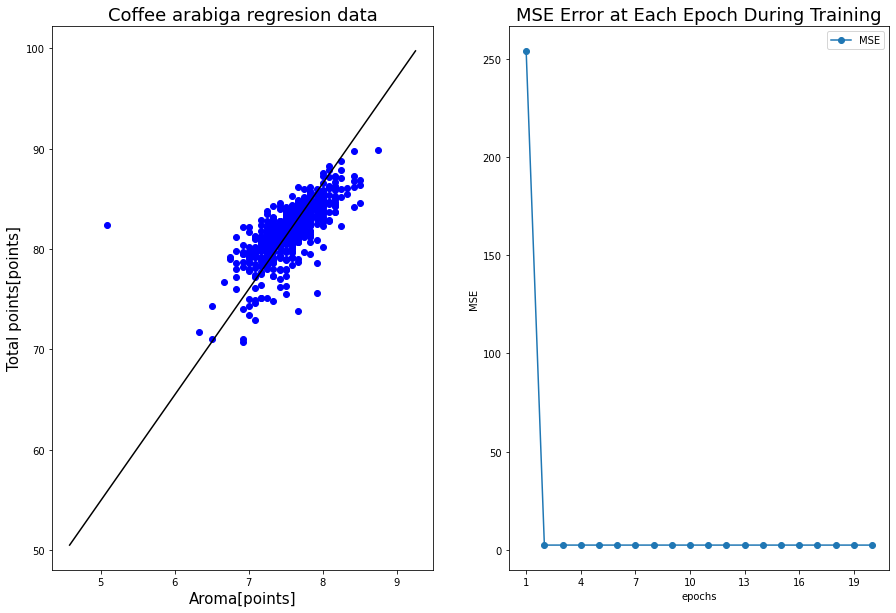

In [222]:
X2 = cafe_final.Aroma.values
y2 = cafe_final.Total_points.values
X2 = X2.reshape(-1, 1)
node2 = SingleNeuron(linear)
node2.train(X2, y2, alpha = .0001, epochs = 20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
yhat2=node2.predict(X2.reshape(-1, 1))
mse= MSE(yhat2,y2)
print ("MSE :", sum(mse)/len(mse))


ax1.scatter(X2, y2, color = "blue")
ax1.plot(domain, node2.predict(domain.reshape(-1, 1)), color = "black")
ax1.set_xlabel("Aroma[points]", fontsize = 15)
ax1.set_ylabel("Total points[points]", fontsize = 15)
ax1.set_title("Coffee arabiga regresion data", fontsize = 18)

ax2.plot(range(1, len(node2.errors_) + 1), 
         node2.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node2.errors_) + 1, 3))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()
plt.close()

MSE : 2.3048455391977476


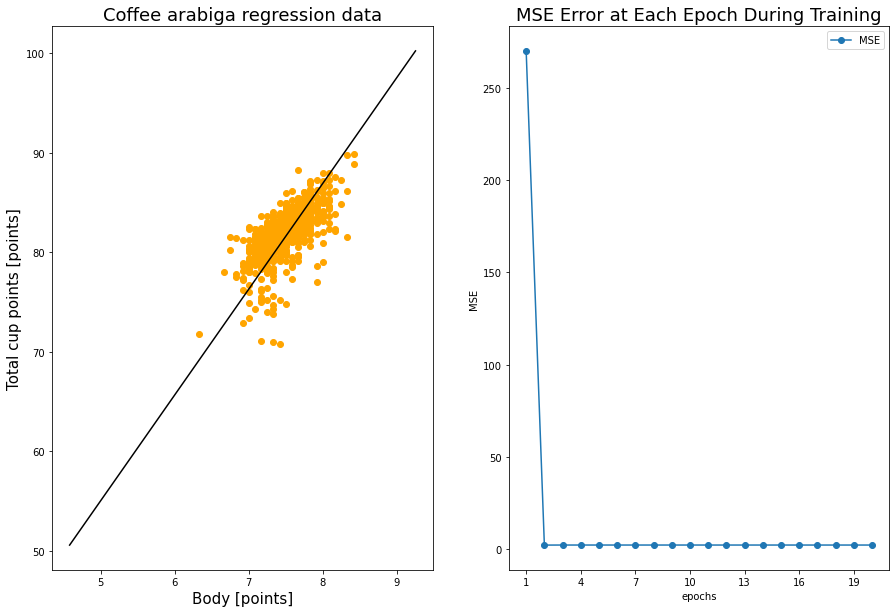

In [227]:
X3 = cafe_final.Body.values
y3 = cafe_final.Total_points.values
X3 = X3.reshape(-1, 1)
node3 = SingleNeuron(linear)
node3.train(X3, y3, alpha = 0.0001, epochs = 20)
yhat3=node3.predict(X.reshape(-1, 1))
mse= MSE(yhat3,y3)
print ("MSE :", sum(mse)/len(mse))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X3, y3, color = "orange")
ax1.plot(domain, node3.predict(domain.reshape(-1, 1)), color = "black")
ax1.set_xlabel("Body [points]", fontsize = 15)
ax1.set_ylabel("Total cup points [points]", fontsize = 15)
ax1.set_title("Coffee arabiga regression data", fontsize = 18)

ax2.plot(range(1, len(node3.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node3.errors_) + 1, 3))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()
plt.close()

MSE : 2.623725895906805


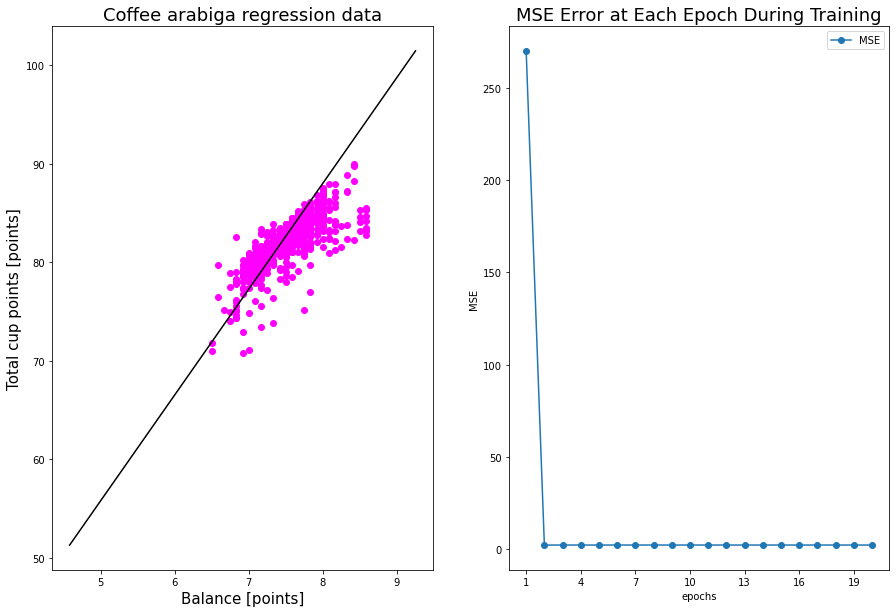

In [224]:
X4 = cafe_final.Balance.values
y4 = cafe_final.Total_points.values
X4 = X4.reshape(-1, 1)
node4 = SingleNeuron(linear)
node4.train(X4, y4, alpha = 0.0001, epochs = 20)
yhat4=node.predict(X4.reshape(-1, 1))
mse= MSE(yhat4,y4)
print ("MSE :", sum(mse)/len(mse))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X4, y4, color = "magenta")
ax1.plot(domain, node4.predict(domain.reshape(-1, 1)), color = "black")
ax1.set_xlabel("Balance [points]", fontsize = 15)
ax1.set_ylabel("Total cup points [points]", fontsize = 15)
ax1.set_title("Coffee arabiga regression data", fontsize = 18)

ax2.plot(range(1, len(node4.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node4.errors_) + 1, 3))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()
plt.close()


MSE : nan


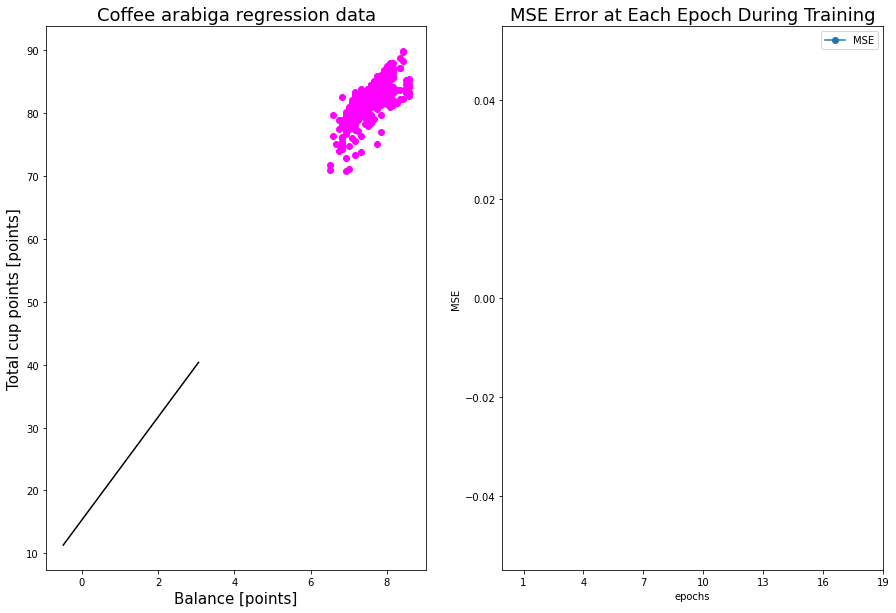

In [78]:
X5 = cafe_final.Balance.values
y5 = cafe_final.Total_points.values
X5 = X5.reshape(-1, 1)
node5 = SingleNeuron(linear)
node5.train(X5, y5, alpha = 0.01, epochs = 20)
yhat5=node.predict(X5.reshape(-1, 1))
mse= MSE(yhat5,y5)
print ("MSE :", sum(mse)/len(mse))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X5, y5, color = "magenta")
ax1.plot(domain, node5.predict(domain.reshape(-1, 1)), color = "black")
ax1.set_xlabel("Balance [points]", fontsize = 15)
ax1.set_ylabel("Total cup points [points]", fontsize = 15)
ax1.set_title("Coffee arabiga regression data", fontsize = 18)

ax2.plot(range(1, len(node4.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node5.errors_) + 1, 3))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()
plt.close()